# Chapter 3: Building Models On Real Data with Keras

In [4]:
%matplotlib inline
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Data Wrangle the Boston House Price Dataset

In [5]:
# For info on the dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(dataset_url, delim_whitespace=True, names=colnames)

# Get a gist of your data
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Note that there is one catagorical variable (CHAS)
# Apply one hot encoding (also called dummy variables)
dataframe = pd.get_dummies(dataframe, columns=["CHAS"])

# Print the new columns
dataframe.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [7]:
# Set the target values as the median value of houses
# Set all other variables as the explanatory variables
# Use the zscore to standardize the numerical variables
targets = zscore(dataframe.MEDV)
predictors = dataframe.drop("MEDV", axis=1).as_matrix()

## Build Your First (Regression) Model with Keras!

#### Set up the Architecture

In [8]:
# Set the number of columns: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add a hidden layer
model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))

model.add(Dense(n_cols//2, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(1, input_shape=(n_cols,)))

#### Compile the model

In [9]:
# Use the adam optimizer and mean_squared_error loss function
model.compile(optimizer="sgd", loss='mse', metrics=["mse"])

In [10]:
# Fit the model
history = model.fit(predictors, targets, epochs=100)

Epoch 1/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan                 
Epoch 2/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 3/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 4/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 5/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 6/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 7/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 8/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 9/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 10/100
506/506 [==============================] - 0s - loss: nan - mean_s

506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 81/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 82/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 83/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 84/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 85/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 86/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 87/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 88/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: nan     
Epoch 89/100
506/506 [==============================] - 0s - loss: nan - mean_squared_error: na

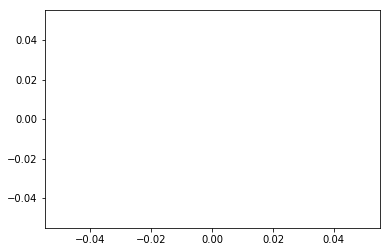

In [11]:
plt.plot(history.history['mean_squared_error'])

### How well can the model aproximate simple functions?

## Build Your First (Classification) Model with Keras!

In [12]:
# Do all the data wrangling on the backend
%run data_wrangling_titantic.ipynb

Targets
 [[ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]
Targets and predictors from titantic data set loaded successfully.


#### Build Model Architecture

In [18]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add a hidden layer
model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))

# Add the output layer
# Notice a softmax activation on the output
model.add(Dense(2, activation='softmax'))

#### Compile the model

In [19]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: categorical_crossentropy


#### Fit the model

In [20]:
# early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model.fit(predictors, targets, epochs=10, batch_size=5, validation_split=.3)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s - loss: 1.2644 - acc: 0.6051 - val_loss: 0.5432 - val_acc: 0.7463
Epoch 2/10
623/623 [==============================] - 0s - loss: 0.6695 - acc: 0.6613 - val_loss: 0.5321 - val_acc: 0.7463
Epoch 3/10
623/623 [==============================] - 0s - loss: 0.6184 - acc: 0.6677 - val_loss: 0.5565 - val_acc: 0.7052
Epoch 4/10
623/623 [==============================] - 0s - loss: 0.5656 - acc: 0.7159 - val_loss: 0.4857 - val_acc: 0.7575
Epoch 5/10
623/623 [==============================] - 0s - loss: 0.5435 - acc: 0.7255 - val_loss: 0.4982 - val_acc: 0.7575
Epoch 6/10
623/623 [==============================] - 0s - loss: 0.5544 - acc: 0.7496 - val_loss: 0.4944 - val_acc: 0.7500
Epoch 7/10
623/623 [==============================] - 0s - loss: 0.5527 - acc: 0.7448 - val_loss: 0.4497 - val_acc: 0.7985
Epoch 8/10
623/623 [==============================] - 0s - loss: 0.4995 - acc: 0.7785 - val_l

In [21]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',  patience=2)

model.fit(x=predictors, y=targets, epochs=100, batch_size=5, validation_split=.3, callbacks=[early_stopping])

Train on 623 samples, validate on 268 samples
Epoch 1/100
623/623 [==============================] - 0s - loss: 0.4841 - acc: 0.7913 - val_loss: 0.6415 - val_acc: 0.7500
Epoch 2/100
623/623 [==============================] - 0s - loss: 0.4730 - acc: 0.7913 - val_loss: 0.4345 - val_acc: 0.7985
Epoch 3/100
623/623 [==============================] - 0s - loss: 0.4694 - acc: 0.8058 - val_loss: 0.4297 - val_acc: 0.7948
Epoch 4/100
623/623 [==============================] - 0s - loss: 0.4857 - acc: 0.7897 - val_loss: 0.4197 - val_acc: 0.8097
Epoch 5/100
623/623 [==============================] - 0s - loss: 0.4618 - acc: 0.8170 - val_loss: 0.4591 - val_acc: 0.7985
Epoch 6/100
623/623 [==============================] - 0s - loss: 0.4609 - acc: 0.8058 - val_loss: 0.4192 - val_acc: 0.7948
Epoch 7/100
623/623 [==============================] - 0s - loss: 0.4661 - acc: 0.7913 - val_loss: 0.5118 - val_acc: 0.7948
Epoch 8/100
623/623 [==============================] - 0s - loss: 0.4618 - acc: 0.7897